# Introduction to the Digits Dataset

## Dataset Overview
The `load_digits()` dataset from scikit-learn is a classic dataset of **8×8 pixel handwritten digit images**, widely used for pattern recognition and machine learning experiments. Containing 1,797 samples of grayscale images, this dataset is particularly useful for:
- Digit classification tasks
- Image recognition experiments
- Understanding machine learning fundamentals

## Key Characteristics
| Property          | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| **Samples**       | 1,797 images                                                               |
| **Features**      | 64 (8×8 pixel grid flattened to 1D array)                                   |
| **Target Values** | Integer labels 0-9                                                         |
| **Data Type**     | Grayscale pixel intensities (0-16 scale)                                    |
| **Source**        | Preprocessed subset of the original NIST dataset                           |


## Challenges & Opportunities
1. **Low Resolution**: Small 8×8 images require careful feature engineering
2. **Handwriting Variation**: Natural differences in writing styles
3. **Compact Format**: Ideal for quick experimentation with algorithms
4. **Multi-class Classification**: 10 distinct classes (digits 0-9)

This dataset serves as an excellent benchmark for testing classification algorithms like K-Nearest Neighbors (KNN), particularly demonstrating how distance-based algorithms handle image data through pixel intensity comparisons.

# These are the library used in this project: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score

In [2]:
digits = datasets.load_digits()

Images shape: (1797, 8, 8)
Data shape: (1797, 64)

Target shape: (1797,)

pixels in the each pic:(8, 8)

pixel code:
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


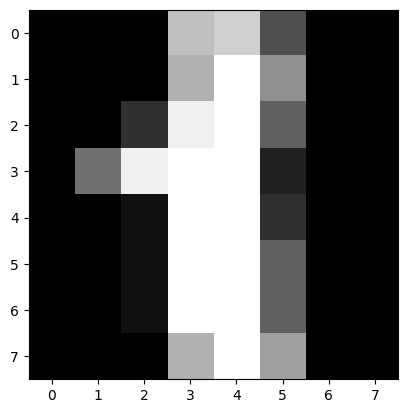

In [3]:
print(f"Images shape: {digits.images.shape}")

print(f"Data shape: {digits.data.shape}\n")      

print(f"Target shape: {digits.target.shape}\n")  

print(f'pixels in the each pic:{digits.images[1].shape}\n')

plt.imshow(digits.images[1],cmap='grey')

print(f'pixel code:\n{digits.data[1].reshape(8,8)}')

In this matrix, 0 represents pure black, higher values indicate lighter shades of gray, and 16 is the brightest, resembling a grayscale image.

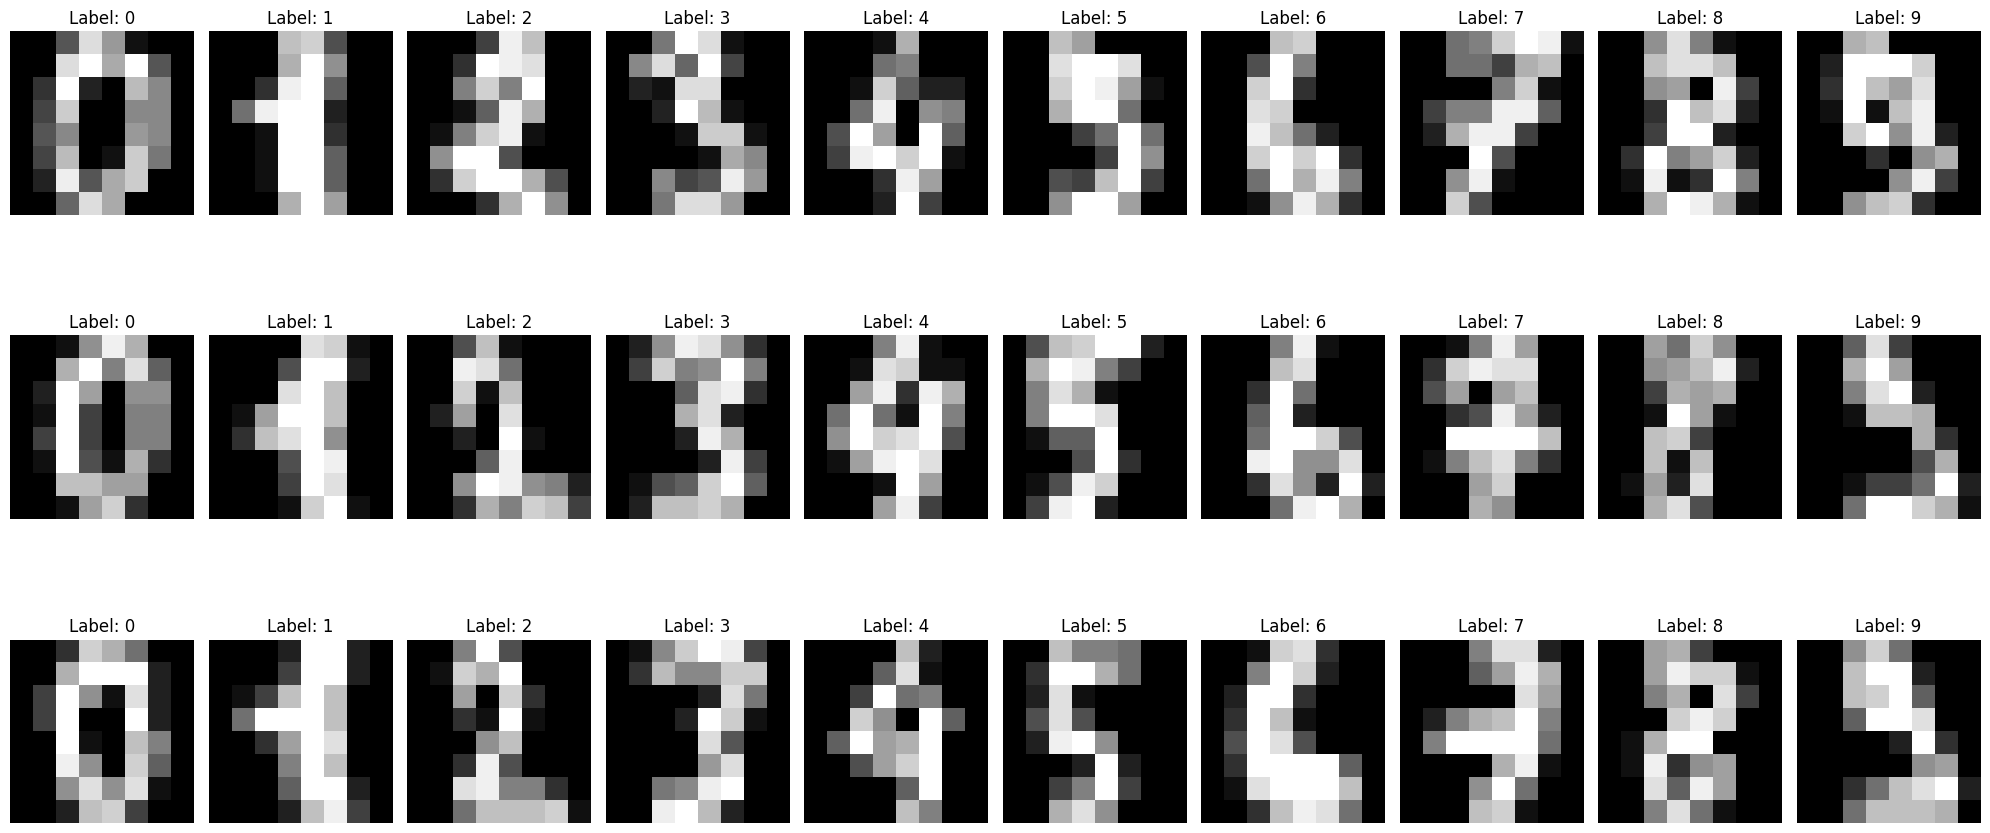

In [4]:
fig, axes = plt.subplots(3, 10, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Each number is written in a unique way, like handwritten digits, but using pixels instead of a pen, allowing the model to recognize patterns and classify them accurately.

In [5]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

### **Data Splitting**  
**Objective:** Divide data into training and test sets for model evaluation.  
**Methodology:**  
- **Split ratio:** 70% training, 30% testing  
- **Random seed:** Fixed (`random_state=42`) for reproducibility  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X_test.shape

(540, 64)

### **Feature Scaling**  
**Objective:** Normalize pixel intensities to a common scale for KNN distance calculations.  

**Methodology:**  
- **Algorithm:** `StandardScaler` (satndarize values to [-1, 1] range)  
- **Formula:**  
  ```
  X_scaled = (X - X_min) / (X_max - X_min)
  ```  
- **Process Flow:**  
  1. Fit scaler **only on training data** (prevents data leakage)  
  2. Transform both training and test sets using the same scaler  

**Rationale for MinMax Scaling (vs. StandardScaler):**  
- Preserves zero-valued pixels (background)  
- Maintains interpretability of original pixel ranges  
- Better suited for distance-based algorithms like KNN  

---

In [8]:
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_train_s

array([[0.    , 0.    , 0.3125, ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.3125, ..., 1.    , 0.6875, 0.125 ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]])

## **KNN Classifier Configuration**

### **Key Parameters Explained**
1. **`n_neighbors=12`**  
   - Uses **12 nearest neighbors** for classification (likely determined from your earlier error rate analysis).  
   - *Trade-off*: Higher values reduce noise but may oversmooth decision boundaries.

2. **`weights='uniform'`**  
   - All neighbors contribute equally to the vote.  
   - *Alternative*: `weights='distance'` would weight votes by inverse distance (closer neighbors matter more).

3. **`algorithm='auto'`**  
   - Automatically selects the most efficient search algorithm (likely `kd_tree` or `ball_tree` for this 64D data).

---

### **Implementation Notes**
- **Scaled Data**: You're correctly using scaled features (`X_train_s`, `X_test_s`), which is crucial for KNN's distance calculations.  
- **Training**: `.fit()` stores the training data to compute neighbors during prediction.  
- **Prediction**: `.predict()` classifies each test sample by majority vote of its 12 nearest neighbors.
 
---

In [9]:
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform', algorithm='auto')
knn

KNeighborsClassifier(n_neighbors=12)

In [10]:
knn.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=12)

In [11]:
y_pred = knn.predict(X_test_s)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [12]:
model_acc = accuracy_score(y_test,y_pred)*100
model_classrep  = classification_report(y_test, y_pred)
model_confmatrix = confusion_matrix(y_test, y_pred)

In [13]:
print(f'Model accuracy:\n{model_acc:.2f}\n')

print(f"Classification Report:\n{model_classrep}\n")

print(f"Confusion Matrix:\n{model_confmatrix}\n")

Model accuracy:
97.78

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      1.00      0.97        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       0.97      1.00      0.98        60
           5       0.98      0.94      0.96        66
           6       0.98      1.00      0.99        53
           7       0.98      1.00      0.99        55
           8       0.98      0.93      0.95        43
           9       0.96      0.93      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0 

<Axes: >

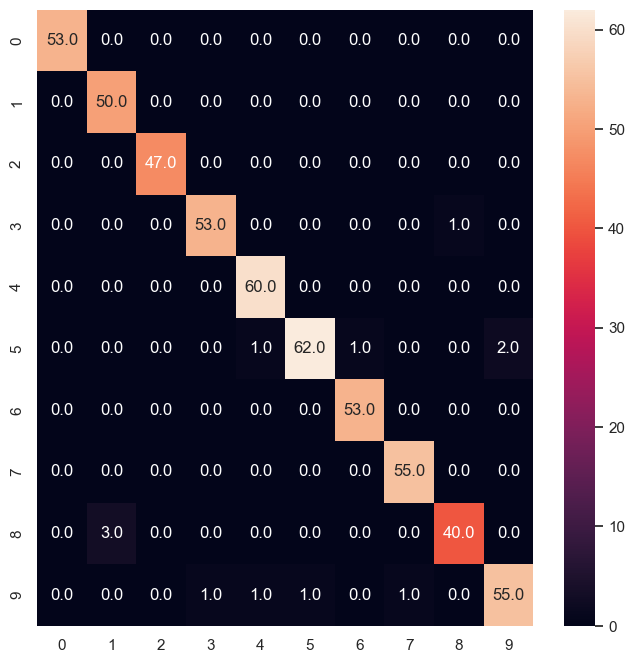

In [14]:
sns.set_theme(rc={'figure.figsize':(8,8)})
sns.heatmap(model_confmatrix,annot=True,fmt=".1f", )

### **What is a Confusion Matrix?**  
A **confusion matrix** is a table used to evaluate the performance of a classification model. It compares the model's predicted labels against the true (actual) labels, showing:  
- **Correct predictions** (diagonal entries)  
- **Misclassifications** (off-diagonal entries)  

For a **10-class digit classification** problem (digits 0–9), the matrix is a **10×10 grid** where:  
- **Rows** = True labels (what the digit actually is)  
- **Columns** = Predicted labels (what the model guessed)  

---

### **Interpretation of Your Confusion Matrix**  
**Accuracy: 97.78%** (528/540 correct)  

#### **1. Diagonal (Correct Predictions)**  
- The diagonal shows counts where **prediction = true label**.  
- Example: `[53, 50, 47, 53, 60, 62, 53, 55, 40, 55]` means:  
  - **53/53 "0"s** correctly predicted  
  - **50/50 "1"s** correctly predicted  
  - ...  
  - **40/43 "8"s** correctly predicted  

#### **2. Off-Diagonal (Errors)**  
- Misclassifications appear as **non-zero values outside the diagonal**.  
- Key errors in your matrix:  
  - **3 "8"s predicted as "1"** (Row 8, Column 1)  
  - **1 "3" predicted as "8"** (Row 3, Column 8)  
  - **1 "5" predicted as "6"** (Row 5, Column 6)  
  - **1 "9" predicted as "7"** (Row 9, Column 7)  

#### **3. Error Patterns**  
- **Digit 8**: Most errors (3/43 misclassified as "1") → Likely due to similar slim shapes.  
- **Digit 9**: Confused with **3/5/7** → Curved strokes may overlap in pixel space.  
- **Digit 5**: Misclassified as **6/9** → Potential loop ambiguity.  

#### **4. Practical Implications**  
- **Model Strengths**: Perfect on **0,1,2,4,6,7** (100% accuracy).  
- **Weaknesses**: Focus on improving **8,9,5** discrimination.  

---


In [15]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

# Visualizing Our High-Accuracy KNN Model in 3D

Now that we've built and tested our KNN classifier for digit recognition and found it to be highly accurate, let's visualize how it works! But we have a challenge - our digit images live in a 64-dimensional space (8×8 pixels), which we can't visualize directly. Here's how we'll tackle this:

## Step 1: Reducing Dimensions with PCA
First, we'll use Principal Component Analysis (PCA) to compress our 64D data down to 3 dimensions while preserving the most important patterns:


In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

**Why PCA?**
- Finds the most informative "viewpoints" of our data
- Preserves about 70-80% of the original information (you can check with `pca.explained_variance_ratio_.sum()`)
- Gives us dimensions we can actually plot

## Step 2: Preparing the Visualization Data
We'll create a DataFrame that combines:
- The 3 principal components
- The actual digit labels
- Our model's predictions

In [17]:
y_pred = knn.predict(X_test)

plot_data = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2', 'PCA 3'])
plot_data['Actual Label'] = y
plot_data['Predicted Label'] = knn.predict(X)

## Step 3: Creating an Interactive 3D Plot
Now for the fun part - visualizing our model's performance in 3D:

In [19]:
fig = px.scatter_3d(plot_data, 
                    x='PCA 1', y='PCA 2', z='PCA 3',
                    color='Predicted Label', 
                    title="KNN Classification of Digits Dataset (PCA Reduced to 3D)",
                    labels={'Predicted Label': 'Digit'},
                    color_continuous_scale='Viridis',  # Choose a better color scale
                    symbol='Actual Label',  # Use different symbols for each digit
                    opacity=0.7,  # Slight transparency for a more polished look
                    hover_data={'Actual Label': True, 'Predicted Label': True})  # Show both actual and predicted labels on hover

# Reduce marker size for smaller dots
fig.update_traces(marker=dict(size=4))  # Set size to a smaller value

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3',
        xaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)")
    ),
    margin=dict(r=10, l=10, b=10, t=30),  # Adjust margins for better fitting
    paper_bgcolor="white",  # Set background color
    legend=dict(
        x=-0.1,  # Move legend to the left
        y=1,  # Keep legend vertically aligned at the top
        xanchor='right',  # Anchor legend to the right of its x position
        yanchor='top',  # Anchor legend to the top of its y position
        bgcolor='rgba(255, 255, 255, 0.7)',  # Add some background to the legend
        bordercolor="Black",  # Add border color for the legend
        borderwidth=1  # Set the border width
    )
)

# Show the plot
fig.show()

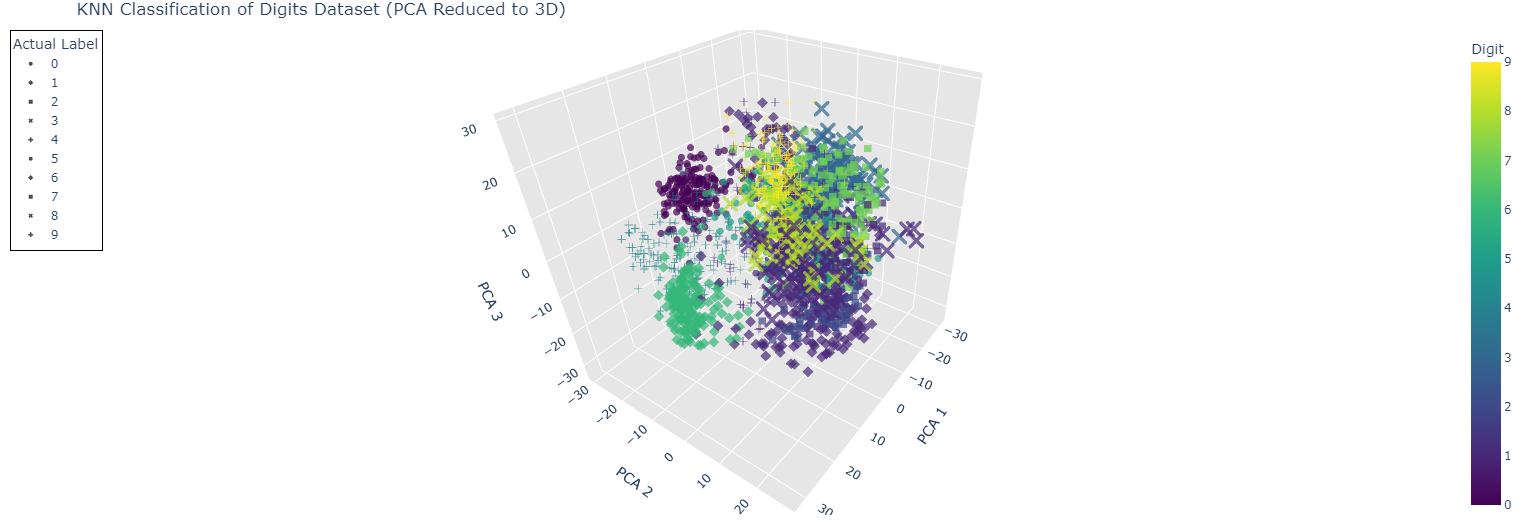